# Live Code 3

------------------------
## Perkenalan
> Bab pengenalan harus diisi dengan identitas.

Nama : William Hugo Ravindra Putra

Batch : 11

Dataset : Country-data from Kaggle

------------------------
## Judul/Penanda Soal
>Sediakan cell markdown sebelum cell import pustaka yang berisi nomor soal dan judul problem yang dikerjakan disetiap soalnya. Setiap soal mengikuti format nomor 3-11.

Sebuah lembaga LSM berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara kurang mampu. Baru-baru ini, mereka telah mampu mengumpulkan sekitar $ 10 juta. CEO LSM tersebut perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Isu signifikan yang muncul saat membuat keputusan ini terkait dengan pemilihan negara mana yang paling membutuhkan bantuan.

Buatlah model machine learning Unsupervised Learning dengan menggunakan KMeans untuk mengelompokkan negara-negara tersebut. Anda diwajibkan untuk menyarankan negara mana yang perlu menjadi fokus CEO. Jawab pertanyaan dibawah ini sebagai acuan analisa/cerita :

1. Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?
> Dari eksplorasi data, saya bisa insight bahwa tidak ada 'Poorest Country' dari beberapa grouping data yang saya tarik (by health, income, inflation, gdpp), tidak ada satu negara yang selalu bottom 5. Tetapi dengan isu tertentu grouping data tersebut bisa menolong negara tertentu lebih banyak dibanding negara yang lain. Tetapi ada negara yang nama Congo yang bisa termasuk economically struggling, bahkan dari itu, jika mau menolong suatu negara dalam keadaan aid (tidak dalam inflation) yang paling sesuai adalah Congo
2. Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.
> Ada 2 clusters yang berhasil dibuat, dan sudah optimal
3. Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?
> Dari deduksi saya bisa bilang cluster, dibagi dari quality of life-nya
4. Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?
> Bahwa overall 1st world country dapat dimasuk ke dalam cluster 1 dan 3rd worl country dapat dimasuk ke dalam cluster 2
5. Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu !

------------------------
## Import Pustaka
>Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pickle

------------------------
## Data Loading
>Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Dataset Loading
df = pd.read_csv('Country-data.csv')
#Displaying data
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
#Checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
#Checking for missing values
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
#Checking for duplicated rows
df.duplicated().sum()

0

In [6]:
#Copying data to manipulate
df1 = df.copy()

------------------------
## Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

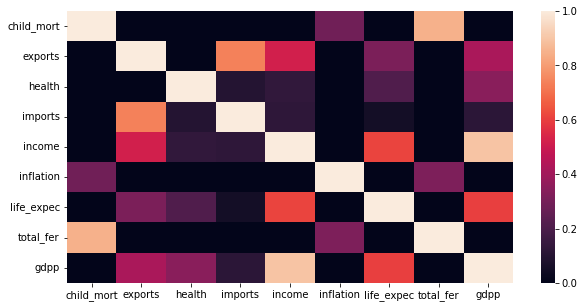

In [7]:
#Checking correlation in DataSet
corr = df1.corr()

#Code to show heatmap correlation
plt.figure(figsize=(10,5))
sns.heatmap(corr, vmin=0, vmax=1)
plt.show()

In [8]:
#Ranking income by the lowest
eda_income = df1.sort_values('income', ascending=False).tail()
eda_income

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334


<AxesSubplot:xlabel='income', ylabel='country'>

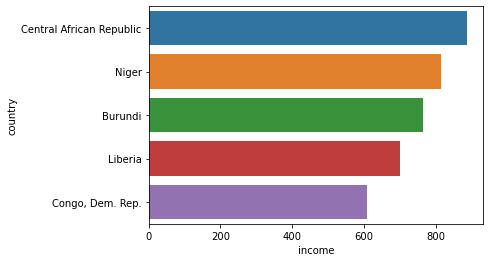

In [9]:
#Displaying data 
sns.barplot(x='income', y='country', data=eda_income)

> From the graph above, I can see that the country with the lowest overall income is Congo. And if my geography is correct, the bottom 5 in terms of income are mostly located in Africa

In [10]:
#Ranking gdpp by the lowest
eda_gdpp = df1.sort_values('gdpp', ascending=False).tail()
eda_gdpp

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231


<AxesSubplot:xlabel='gdpp', ylabel='country'>

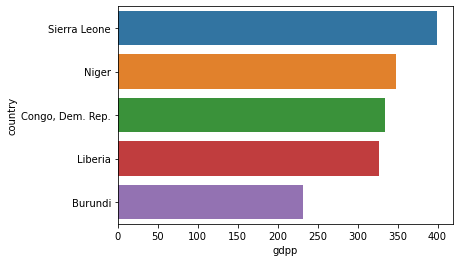

In [11]:
#Displaying data 
sns.barplot(x='gdpp', y='country', data=eda_gdpp)

> From the graph above, I can see that the country with the lowest overall gdpp is Burundi, with Congo in the bottom 3. And if my geography is correct, the bottom 5 in terms of gdpp are mostly located in Africa

In [12]:
#Ranking health by the lowest
eda_health = df1.sort_values('health', ascending=False).tail()
eda_health

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.31,67.9,2.83,4440
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.70,60.4,4.95,2740
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.90,65.3,3.85,1040
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.04,66.8,2.41,988
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.98,79.5,2.07,70300


<AxesSubplot:xlabel='health', ylabel='country'>

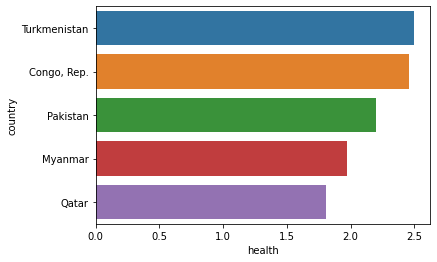

In [13]:
#Displaying data 
sns.barplot(x='health', y='country', data=eda_health)

> From the graph above, I can see that the country with the lowest overall health is Qatar, with Congo still making it into the top 5.

In [14]:
#Ranking inflation by the highest
eda_inflation = df1.sort_values('inflation', ascending=False).head()
eda_inflation

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.9,75.4,2.47,13500
103,Mongolia,26.1,46.7,5.44,56.7,7710,39.2,66.2,2.64,2650
149,Timor-Leste,62.6,2.2,9.12,27.8,1850,26.5,71.1,6.23,3600
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.9,60.9,5.21,17100


<AxesSubplot:xlabel='inflation', ylabel='country'>

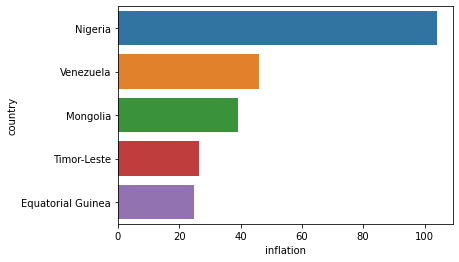

In [15]:
#Displaying data 
sns.barplot(x='inflation', y='country', data=eda_inflation)

> From the graph above, I can see that the country with the highest overall inflation is Nigeria.

By the graphs above, I can see that Congo is struggling in maintaining a suitable quality of life for its citizen and overall gdpp and income. If needed to aid a country that is struggling in those categories, Congo is the best bet to aid in

------------------------
## Data Preprocessing
>Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-set dan inference-set, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Model Inference

In [16]:
#Get Data for Model Inference
data_inf = df1.sample(10, random_state=17)
#Displaying Model inference
data_inf

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
87,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170
75,Italy,4.0,25.20,9.53,27.2,36200,0.319,81.7,1.46,35800
78,Jordan,21.1,48.30,8.04,69.0,9470,8.430,75.8,3.66,3680
128,Saudi Arabia,15.7,49.60,4.29,33.0,45400,17.200,75.1,2.96,19300
97,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708
109,Nepal,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592
16,Belize,18.8,58.20,5.20,57.5,7880,1.140,71.4,2.71,4340
48,El Salvador,19.2,26.90,6.91,46.6,7300,2.650,74.1,2.27,2990
19,Bolivia,46.6,41.20,4.84,34.3,5410,8.780,71.6,3.20,1980
77,Japan,3.2,15.00,9.49,13.6,35800,-1.900,82.8,1.39,44500


In [17]:
#Remove Inference Set
df1 = df1.drop(data_inf.index)
#Displaying Inference
df1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [18]:
#Reset Index
df1.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
#Displaying Model Inference
data_inf

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170
1,Italy,4.0,25.20,9.53,27.2,36200,0.319,81.7,1.46,35800
2,Jordan,21.1,48.30,8.04,69.0,9470,8.430,75.8,3.66,3680
3,Saudi Arabia,15.7,49.60,4.29,33.0,45400,17.200,75.1,2.96,19300
4,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708
5,Nepal,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592
6,Belize,18.8,58.20,5.20,57.5,7880,1.140,71.4,2.71,4340
7,El Salvador,19.2,26.90,6.91,46.6,7300,2.650,74.1,2.27,2990
8,Bolivia,46.6,41.20,4.84,34.3,5410,8.780,71.6,3.20,1980
9,Japan,3.2,15.00,9.49,13.6,35800,-1.900,82.8,1.39,44500


### Handling Outliers

In [19]:
# Looping to check the Distribution of each column
dist_check = df1.skew(numeric_only=True)

normal_dist = []
skew_dist = []
for x in range(len(dist_check)):
    if dist_check.values[x] < -0.5:
        skew_dist.append(dist_check.index[x])
    elif dist_check.values[x] > 0.5:
        skew_dist.append(dist_check.index[x])
    else:
        normal_dist.append(dist_check.index[x])

In [20]:
# Skewed distribution
print('Skewed distribution :', skew_dist)
print("")
# Normal distribution
print('Normal distribution :',normal_dist)

Skewed distribution : ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

Normal distribution : []


> With the function above, I can see which columns have Normal or Skewed Distribution. After running the function, I have found out that all of the data are Skewed. This information will come to play when I'm handling the outliers

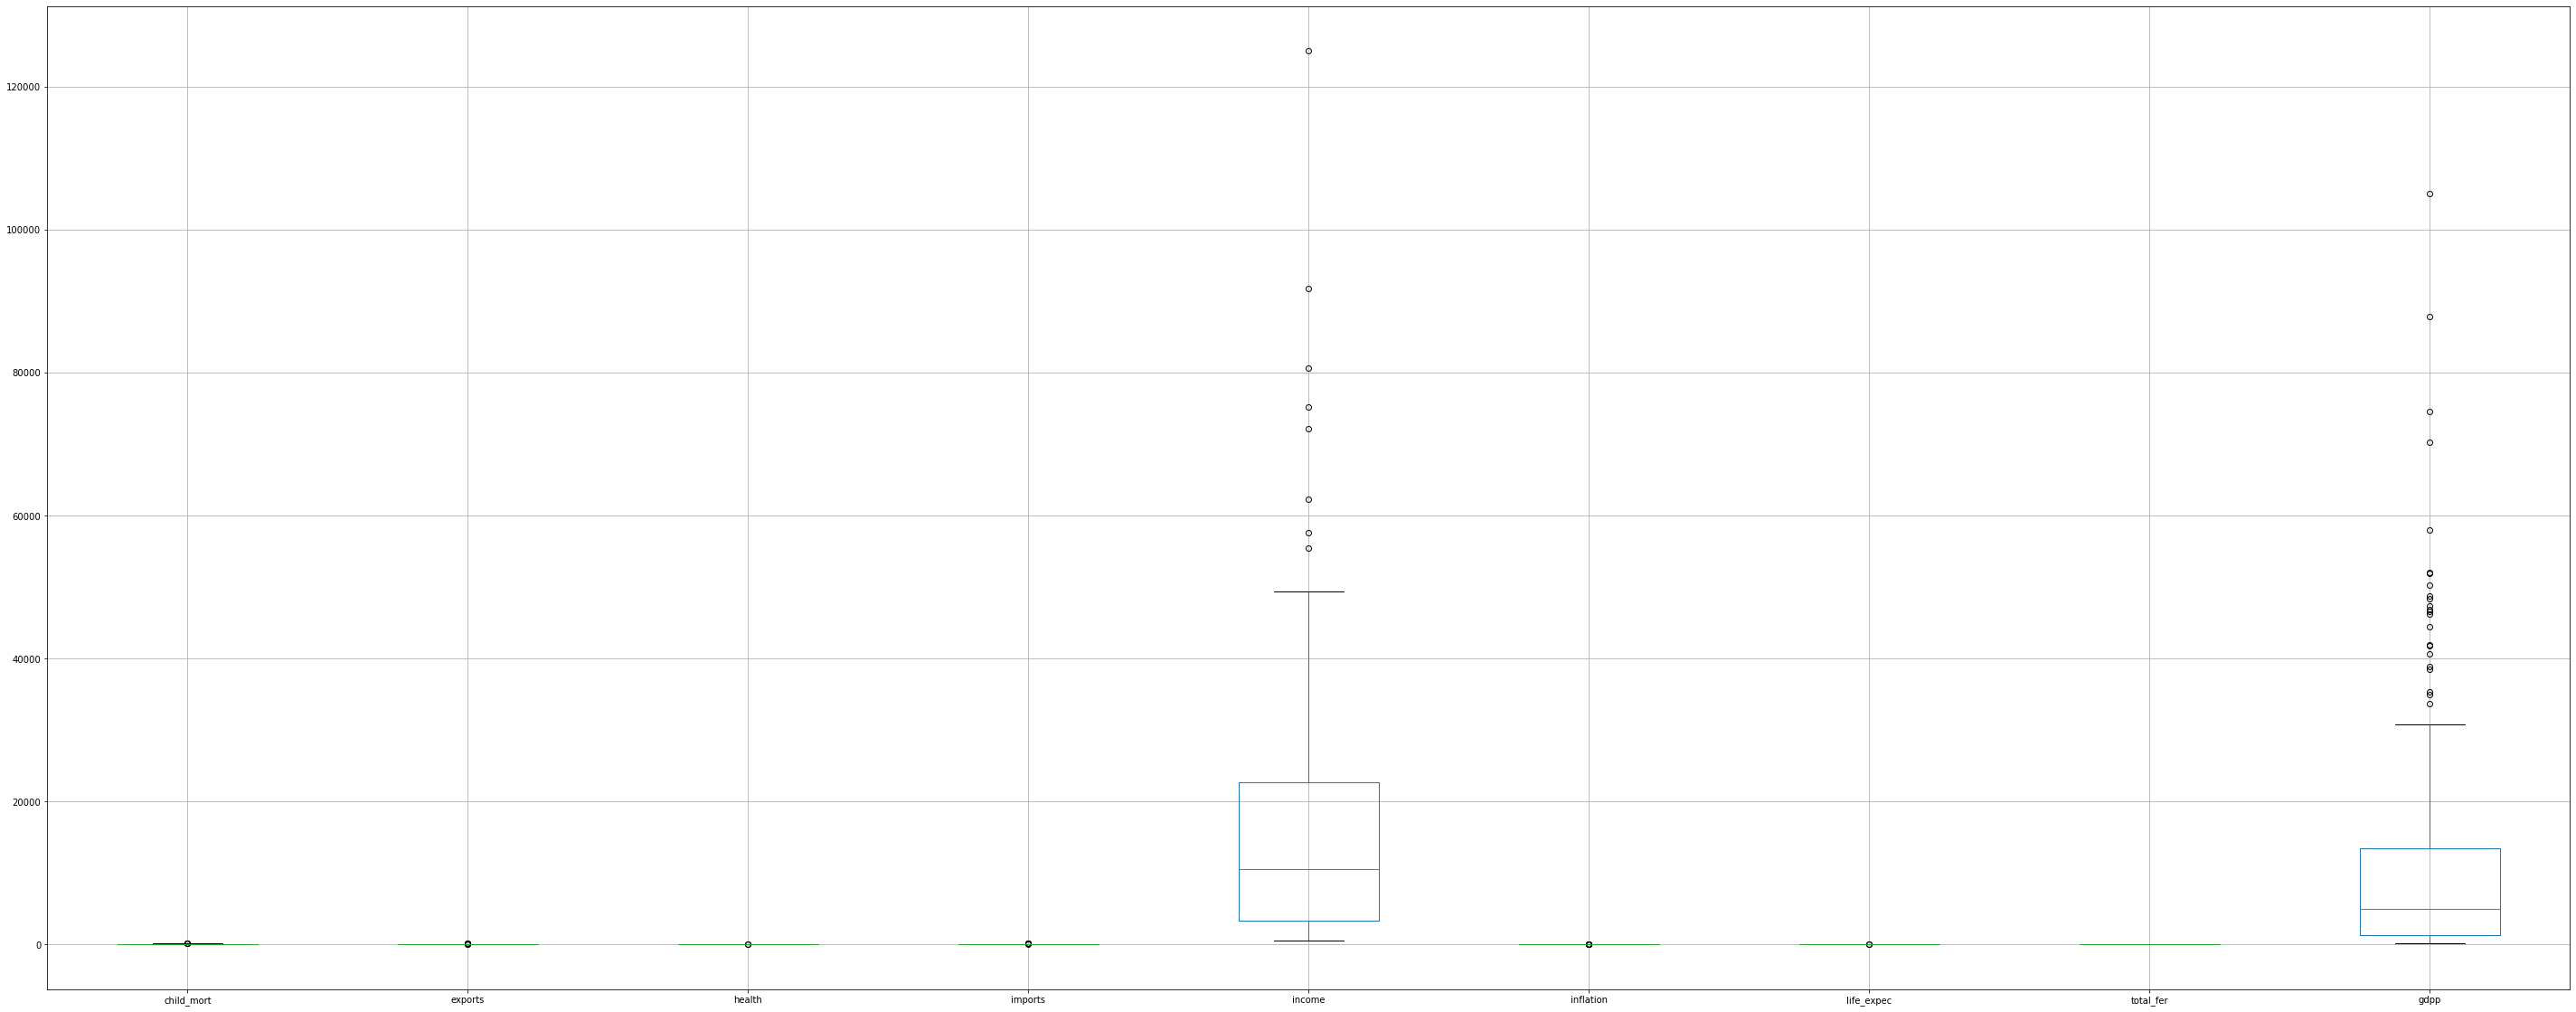

In [21]:
# Plot to see outlers of all columns
df1.boxplot(figsize= [50,20])

plt.show()

> From the boxplots above, I can see that there are 2 columns which have a significant amount of outliers compared to the rest which is Income and GDPP

In [22]:
# MAking a function to visualise the outliers and graph
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

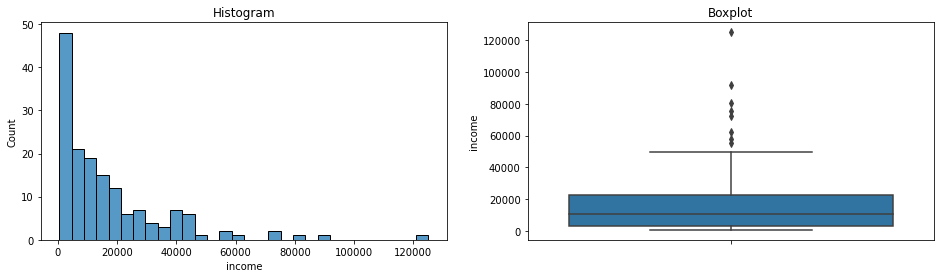

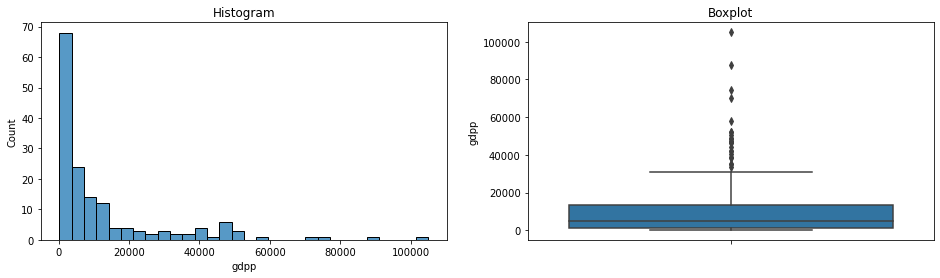

In [23]:
#Checking the outliers and graph distribution on specific columns
diagnostic_plots(df1, 'income')
diagnostic_plots(df1, 'gdpp')

> By taking a close look at the boxplots and graphs of the column Income and GDPP, I can see the different ways I can handle the outliers. I could just censor the ones in the extreme range or even in the normal range, but before I do that I will need more information

In [24]:
#Making a function to check the outliers of the data with Skewed Distributed 
def detect_skew(df, variable, distance):
    
    for i in variable:
        
        IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
        upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        upper_boundary_count = df[(df[variable] > upper_boundary)][variable].count()

        lower_boundary_count = df[(df[variable] < lower_boundary)][variable].count()
        
        total_count = upper_boundary_count + lower_boundary_count

        percentage = (total_count/len(df[variable])*100)

        a = ({'Variable':variable, 'Total Outliers':total_count, 'Percentage':percentage})

    return print(a)

In [25]:
#Checking the outliers in the extreme range
print('Normal Range')
for i in skew_dist:
    detect_skew(df1, variable=i, distance=1.5)
print('')
print('Extreme Range')
#Checking the outliers in the extreme range
for i in skew_dist:
    detect_skew(df1, variable=i, distance=3)

Normal Range
{'Variable': 'child_mort', 'Total Outliers': 4, 'Percentage': 2.547770700636943}
{'Variable': 'exports', 'Total Outliers': 5, 'Percentage': 3.1847133757961785}
{'Variable': 'health', 'Total Outliers': 2, 'Percentage': 1.2738853503184715}
{'Variable': 'imports', 'Total Outliers': 4, 'Percentage': 2.547770700636943}
{'Variable': 'income', 'Total Outliers': 8, 'Percentage': 5.095541401273886}
{'Variable': 'inflation', 'Total Outliers': 5, 'Percentage': 3.1847133757961785}
{'Variable': 'life_expec', 'Total Outliers': 2, 'Percentage': 1.2738853503184715}
{'Variable': 'total_fer', 'Total Outliers': 0, 'Percentage': 0.0}
{'Variable': 'gdpp', 'Total Outliers': 23, 'Percentage': 14.64968152866242}

Extreme Range
{'Variable': 'child_mort', 'Total Outliers': 0, 'Percentage': 0.0}
{'Variable': 'exports', 'Total Outliers': 3, 'Percentage': 1.910828025477707}
{'Variable': 'health', 'Total Outliers': 0, 'Percentage': 0.0}
{'Variable': 'imports', 'Total Outliers': 2, 'Percentage': 1.27388

> From the looping above, I have calculated the amount of outliers in the dataset by percentage. I was thinking of only handling the extreme outliers for the column Income and GDPP, but after looking further I can see that it only makes up less than 10% of the data. While the outliers in the normal range make up more than 10%. With that reasoning, I will handle all the outliers in the normal range

In [26]:
#Censoring
windsoriser = Winsorizer(capping_method='iqr', 
                          tail='both',  #Censor both the right and left end outliers
                          fold=1.5, #In extreme range
                          variables=['child_mort', 'exports', 'health', 'imports', 'income', 
                          'inflation', 'life_expec', 'total_fer', 'gdpp'])

windsoriser.fit(df1)

df1_cen = windsoriser.transform(df1)

In [27]:
#Checking the information before censoring
print('Dataframe - Before Capping')
print(df1.describe())

Dataframe - Before Capping
       child_mort     exports      health     imports         income  \
count  157.000000  157.000000  157.000000  157.000000     157.000000   
mean    38.081529   41.586108    6.806306   46.987044   17257.726115   
std     40.220740   27.943956    2.772783   24.240517   19467.438193   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      7.900000   23.800000    4.910000   30.000000    3370.000000   
50%     19.300000   35.000000    6.320000   43.300000   10500.000000   
75%     62.200000   51.400000    8.550000   58.900000   22700.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  157.000000  157.000000  157.000000     157.000000  
mean     7.893803   70.547771    2.943949   13057.031847  
std     10.788898    8.801971    1.522238   18499.081836  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.850000   65.300000

In [28]:
#Checking the information After censoring
print('Dataframe - After Capping')
print(df1_cen.describe())

Dataframe - After Capping
       child_mort     exports      health     imports        income  \
count  157.000000  157.000000  157.000000  157.000000    157.000000   
mean    37.492994   39.924962    6.780318   45.910611  15942.821656   
std     38.257043   21.586252    2.685816   20.154208  15125.747418   
min      2.600000    0.109000    1.810000    0.065900    609.000000   
25%      7.900000   23.800000    4.910000   30.000000   3370.000000   
50%     19.300000   35.000000    6.320000   43.300000  10500.000000   
75%     62.200000   51.400000    8.550000   58.900000  22700.000000   
max    143.650000   92.800000   14.010000  102.250000  51695.000000   

        inflation  life_expec   total_fer          gdpp  
count  157.000000  157.000000  157.000000    157.000000  
mean     7.141414   70.652866    2.943949  10161.331210  
std      6.769039    8.430404    1.522238  11138.883779  
min     -4.210000   48.050000    1.150000    231.000000  
25%      1.850000   65.300000    1.790000   

> From the description above, I can see that the data has been censored. A significant change is in the maximum value of GDPP before and after (105000 to 31725)

### Feature Selection

In [29]:
country = df1_cen['country']

In [30]:
df1_cen = df1_cen.drop('country', axis=1)

In [31]:
df1_cen.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


> Here I have chosen to drop the column country because it is in the form of string/words, and since I'm using Unsupervised Learning, it will be better off if I just drop all categorical forms of data

### Feature Scaling

In [32]:
#Scaling data using MinMaxScaler
scaler=MinMaxScaler()
df1_scaled=scaler.fit_transform(df1_cen)

> I have used MinMaxScaler because all of the data are Skewed

### VIF

In [33]:
#Making a table for features/columns 
vif_data = pd.DataFrame()
vif_data["feature"] = df1_cen.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df1_cen.values, i) for i in range(len(df1_cen.columns))]

#Displaying table
vif_data

,feature,VIF
0,child_mort,10.317521
1,exports,16.154156
2,health,11.754382
3,imports,16.939811
4,income,38.948836
5,inflation,3.385839
6,life_expec,24.263414
7,total_fer,22.473373
8,gdpp,31.052655


> By checking the VIF, I can predict how many columns/dimensions can be reduced to make the clustering simplier and easier to find. Here I can see columns with the VIF value comapred to the rest which are 'inflation' and 'child mort' and maybe even health
> If my prediction is right it will reduce the dimension by 2

### PCA

In [34]:
#Defining and training PCA
pca = PCA()
pca.fit(df1_scaled)

PCA()

In [35]:
#Checking how many dimesions are there after PCA
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

5

> Although my final prediction was a bit off, it is still has the similar outcome of my analysis above. Here for PCA it has decided to reduce the dimension into 5 (which I assume reduced the column of 'inflation', 'child_mort' and 'health')

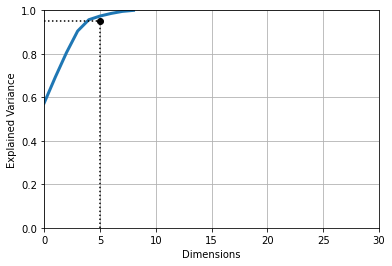

In [36]:
#Checking the work of PCA in the form of a graph
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 30, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

> From the graph above, I can see how many dimensions retain how many percentage of the data. Assuming I am want 95% of the data, I will have to take 5 dimensions

In [37]:
#Fitting the model with 10 dimensions
pca = PCA(n_components=5)
df1_reduced = pca.fit_transform(df1_scaled)

In [38]:
#Checking the dimensions
pca.n_components

5

> Here I am making sure that the pca has 5 dimensions on it

In [39]:
pca_df = pd.DataFrame(df1_reduced, columns=["PC1", "PC2","PC3", "PC4", "PC5"])
data = pd.concat([country, pca_df], axis=1)
data.head()

,country,PC1,PC2,PC3,PC4,PC5
0,Afghanistan,-0.815187,-0.230086,-0.053129,-0.248609,0.030507
1,Albania,0.011948,0.225603,-0.279407,0.171034,-0.021864
2,Algeria,-0.127937,0.009470,0.085057,0.434357,0.063032
3,Angola,-0.793278,-0.192696,0.715756,0.015691,0.080093
4,Antigua and Barbuda,0.292518,0.216766,-0.072597,0.006549,-0.107428


------------------------
## Model Definition
>Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

### KMeans

> Before I define the KMeans models, I first have to find the suitable/optimal amount of K/clusters

c:\Users\Hugo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


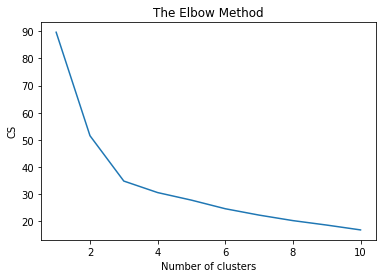

In [40]:
#Checking the optimal K using the Elbow Method
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(df1_reduced)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

> Here I have chosen to check the optimal amount of clusters by using the Elbow Method. By checking the graph, I can see that there are 2 significant dents/turns (one in 2 and the other in 3). By seeing the turns, I can see that 3 clusters is suitable for the data. But before I use 3 clusters, I will find the optimal amount of clusters using a different method

In [41]:
# create a list for different values of K
n_clusters = [2,3,4,5]

# use 'for' loop to build the clusters
# 'random_state' returns the same sample each time you run the code  
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters :
    cluster = KMeans(n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(df1_reduced)
    
    score = silhouette_score(df1_reduced, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.37703791471585446)
For n_clusters = 3, silhouette score is 0.354652976802821)
For n_clusters = 4, silhouette score is 0.31320581130114444)
For n_clusters = 5, silhouette score is 0.2956368118281931)


> The other method I have mentioned was checking the silhouette score of each clusters. By the scoring, I can see that 2 clusters got a better score by 0.02 over 3 clusters. Because of that I will be using 2 clusters 

In [42]:
#Defining KMeans
kmeans = KMeans(n_clusters=2)

------------------------
## Model Training
>Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

### KMeans

In [43]:
#Training the model
y_pred = kmeans.fit_predict(df1_reduced)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0])

In [44]:
#Seeing the clusters centers
kmeans.cluster_centers_

array([[-0.3329125 ,  0.02344945, -0.02415934,  0.0351393 ,  0.01162692],
       [ 0.71243275, -0.05018183,  0.05170098, -0.0751981 , -0.02488162]])

In [45]:
#Checking the cluster groupings
kmeans.labels_

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0])

------------------------
## Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

### KMeans

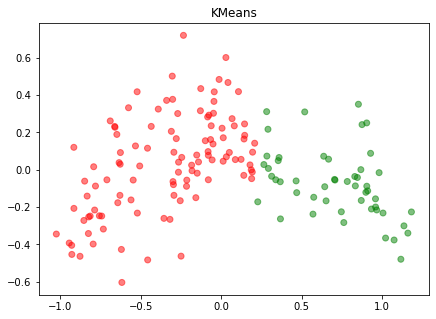

In [46]:
# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]

# Plot the scatter digram
plt.figure(figsize = (7,5))
plt.scatter(df1_reduced[:,0],df1_reduced[:,3], c= label_color, alpha=0.5) 
plt.title('KMeans')
plt.show()

> From the  graph above, I can see that the data has been able to divide or cluster the dataset

In [47]:
#Making a new column for Cluster ID
data['Cluster_Id'] = kmeans.labels_
data.head(10)

,country,PC1,PC2,PC3,PC4,PC5,Cluster_Id
0,Afghanistan,-0.815187,-0.230086,-0.053129,-0.248609,0.030507,0
1,Albania,0.011948,0.225603,-0.279407,0.171034,-0.021864,0
2,Algeria,-0.127937,0.009470,0.085057,0.434357,0.063032,0
3,Angola,-0.793278,-0.192696,0.715756,0.015691,0.080093,0
4,Antigua and Barbuda,0.292518,0.216766,-0.072597,0.006549,-0.107428,1
5,Argentina,0.041265,-0.322143,-0.116269,0.467032,0.317750,0
6,Armenia,-0.130140,0.195732,-0.212666,0.315680,-0.081007,0
7,Australia,0.867031,-0.495521,-0.221621,0.000089,-0.166185,1
8,Austria,1.004767,-0.238601,-0.054931,-0.232273,0.053344,1
9,Azerbaijan,-0.077127,-0.015219,0.120002,0.292064,0.071091,0


In [48]:
#Checking the distribution of clusters
data['Cluster_Id'].value_counts()

0    107
1     50
Name: Cluster_Id, dtype: int64

> Here I can see that most countries are grouped into the 0 cluster, which I assume is underperforming in the quality of life for its citizen

In [49]:
#Merging data of Cluster ID with the original df1
df_merge = pd.merge(df1,data,on='country')
df_merge_col = df_merge[['country','child_mort','exports','imports','health','income','inflation','life_expec','total_fer','gdpp','Cluster_Id']]
df_merge_col.head()

,country,child_mort,exports,imports,health,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,10.0,44.9,7.58,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,48.6,6.55,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,31.4,4.17,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,42.9,2.85,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,58.9,6.03,19100,1.44,76.8,2.13,12200,1


<AxesSubplot:xlabel='life_expec', ylabel='income'>

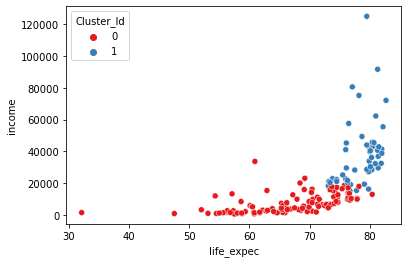

In [50]:
sns.scatterplot(x='life_expec',y='income',hue='Cluster_Id',data = df_merge_col,legend='full',palette="Set1")

> From the graph above, I can see that the higher the income and life expentancy of the country the more likely it is to be grouped into cluster 1

<AxesSubplot:xlabel='exports', ylabel='imports'>

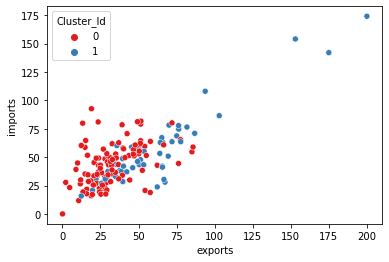

In [51]:
sns.scatterplot(x='exports',y='imports',hue='Cluster_Id',data = df_merge_col,legend='full',palette="Set1")

> From the graph above, I can see that the more the exports of the country is more likely it is to be grouped into cluster 1

<AxesSubplot:xlabel='life_expec', ylabel='gdpp'>

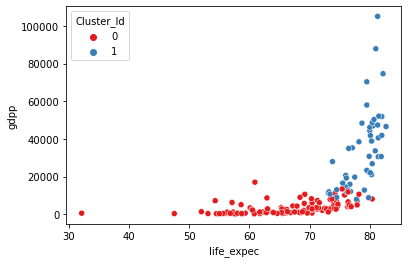

In [52]:
sns.scatterplot(x='life_expec',y='gdpp',hue='Cluster_Id',data = df_merge_col,legend='full',palette="Set1")

> From the graph above, I can see that the higher the gdpp and life expentancy of the country the more likely it is to be grouped into cluster 1

By checking all the graphs above, I can safely say that the cluster is determining the grouping by seeing the overall quality of life and competence of the country. With a better quality of life the more likely it is to be grouped into cluster 1

### Model Saving

In [53]:
# Model Saving
with open('model_scaler.pkl', 'wb') as file1:
    pickle.dump(scaler, file1)

with open('pca.pkl', 'wb') as file2:
    pickle.dump(pca, file2)

with open('kmeans.pkl', 'wb') as file3:
    pickle.dump(kmeans, file3)

------------------------
## Model Inference
>Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

### Model Loading

In [54]:
# Model Loading
with open('model_scaler.pkl', 'rb') as file1:
    scaler = pickle.load(file1)

with open('pca.pkl', 'rb') as file2:
    pca = pickle.load(file2)

with open('kmeans.pkl', 'rb') as file2:
    kmeans = pickle.load(file2)

### Clustering Model Inference

In [55]:
#Displaying the data inference
data_inf

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Lesotho,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170
1,Italy,4.0,25.20,9.53,27.2,36200,0.319,81.7,1.46,35800
2,Jordan,21.1,48.30,8.04,69.0,9470,8.430,75.8,3.66,3680
3,Saudi Arabia,15.7,49.60,4.29,33.0,45400,17.200,75.1,2.96,19300
4,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708
5,Nepal,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592
6,Belize,18.8,58.20,5.20,57.5,7880,1.140,71.4,2.71,4340
7,El Salvador,19.2,26.90,6.91,46.6,7300,2.650,74.1,2.27,2990
8,Bolivia,46.6,41.20,4.84,34.3,5410,8.780,71.6,3.20,1980
9,Japan,3.2,15.00,9.49,13.6,35800,-1.900,82.8,1.39,44500


In [56]:
#Dropping unnecessary columns for clustering
X_data = data_inf.drop(['country'], axis=1)
X_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,99.7,39.40,11.10,101.0,2380,4.150,46.5,3.30,1170
1,4.0,25.20,9.53,27.2,36200,0.319,81.7,1.46,35800
2,21.1,48.30,8.04,69.0,9470,8.430,75.8,3.66,3680
3,15.7,49.60,4.29,33.0,45400,17.200,75.1,2.96,19300
4,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708
5,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592
6,18.8,58.20,5.20,57.5,7880,1.140,71.4,2.71,4340
7,19.2,26.90,6.91,46.6,7300,2.650,74.1,2.27,2990
8,46.6,41.20,4.84,34.3,5410,8.780,71.6,3.20,1980
9,3.2,15.00,9.49,13.6,35800,-1.900,82.8,1.39,44500


In [57]:
#Scaling the data inference
data_inf_scaled = scaler.transform(X_data)

In [58]:
#Reducing the Dimensions
reduced = pca.fit_transform(data_inf_scaled)
reduced

array([[-0.82361829,  0.62722851, -0.30989902,  0.26324771,  0.11903314],
       [ 1.03312818,  0.20698907, -0.04461407, -0.03495357, -0.00162508],
       [-0.20010781, -0.19758242, -0.2616583 ,  0.05167881, -0.10884113],
       [ 0.48818398, -0.34703567,  0.23493374,  0.53295131,  0.0098775 ],
       [-0.79571102,  0.28475615,  0.6005867 , -0.10351937, -0.17342291],
       [-0.37461034, -0.26573268,  0.12521749, -0.14505766,  0.38044188],
       [-0.18014155, -0.19435557, -0.27608873, -0.05697539, -0.24990975],
       [-0.12529515, -0.17401786, -0.21025936, -0.24551958,  0.02950775],
       [-0.29897204, -0.27062882,  0.06887246, -0.10137298, -0.02714262],
       [ 1.27714404,  0.33037929,  0.07290911, -0.16047928,  0.02208121]])

In [59]:
#Predicting data inference using AdaBoosting
y_pred_inf = kmeans.predict(reduced)
y_pred_inf

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 1])

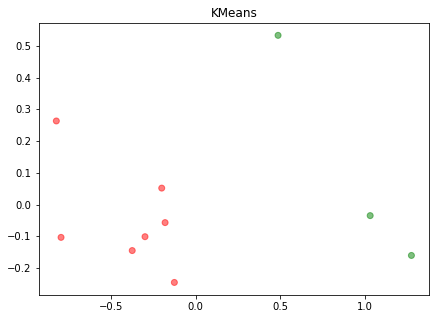

In [60]:
# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g'}
label_color = [LABEL_COLOR_MAP[l] for l in y_pred_inf]

# Plot the scatter digram
plt.figure(figsize = (7,5))
plt.scatter(reduced[:,0],reduced[:,3], c= label_color, alpha=0.5) 
plt.title('KMeans')
plt.show()

> From the graph above, I can see that the model is also able to group/cluster up the model inference with the same group range as the actual data
> By checking the coding above, I can see that Lesotho, Jordan, Mali, Nepal, Belize, El Salvador and Bolivia have been grouped into cluster 1, while Italy, Saudi Arabia and Japan have been grouped into cluster 2. The clusters could mean the quality of life for the average citizen, cluster 1 could be the quality of life is not as good compared to cluster 2

------------------------
## Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

### Conclusion

I can say that the model is able to divide the countries into different clusters. From deduction, I can say that it is able to differenciate the quality of life of the country by checking the income, health, life expentancy, inflation and etc., from each country and group them into a specified column. 

By checking the clusters I can see which country is in cluster 1 and 2, from the analysis I can see most (if not all) of the first world countries are in one cluster while the others are in another

In the case of the  Model Inference, I can see that the 1st world countries are able to put in the green cluster while the 3rd world country are put in the red clusters.

Overall I am happy with the outcome of the clustering as it still has some sense as to why it grouped a country into a cluster